# **Lab 5**

TI3155TU Deep Learning (2024 - 2025)

Authors: Elena Congeduti


# Instructions
We recommend that you fork the lab notebooks by selecting `Copy & Edit` on the notebook's homepage. This will create a copy in your Kaggle repository, allowing you to work on it and save your progress as you go. Kaggle provides a pre-configured virtual environment, which means that most of the libraries we will use are already downloaded and ready to use. Therefore, you typically do **not** need to `pip install` additional resources.

Alternatively, to work on Google Colab, you just need to select the `Open in Colab` option in the notebook's homepage menu. Finally, if you want to work locally, you will need to set up your own virtual environment. Check the Lab Instructions in [Learning Material](https://brightspace.tudelft.nl/d2l/le/content/682797/Home?itemIdentifier=D2L.LE.Content.ContentObject.ModuleCO-3812764) on Brightspace for detailed information on the virtual environment configuration.

These labs include programming exercises and insight questions. Follow the instructions in the notebook. Fill in the text blocks to answer the questions and write your own code to solve the programming tasks within the designated part of the code blocks:

```python
#############################################################################
#                           START OF YOUR CODE                              #
#############################################################################


#############################################################################
#                            END OF YOUR CODE                               #
#############################################################################
```

Solutions will be shared the week after the lab is published. Note that these labs are designed for practice and are therefore **ungraded**.

With the following command line we install the `torchsummary` package in Kaggle environment. 

In [ ]:
!pip install torchsummary

In [ ]:
# Setup
import numpy as np

import torch
import torch.nn as nn

from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import matplotlib.pyplot as plt
from torchsummary import summary

import time

# 1 Convolutional Layer Components
In this lab, we will focus on how to implement and use Convolutional Neural Networks (CNNs). We will start by covering the core components of a convolution layer and then progressively introduce all the elements that make up a covolutional network. Here we will examine and implement each component of a convolutional layer, starting with the convolution operation.

## 1.1 Convolution
Let us consider an input image $x$ with a single channel ($N_\text{in}=1$),  height $H$ and width $W$. We consider also a square kernel $k$ with size $s$, $k\in\mathbb{R}^{s\times s}$.
The output $y$ resulting from the 2D convolution between $x$ and the kernel $k$ can be defined as follows

$$
y_{i,j}=\sum_{n,m=0}^{s-1} x_{i+n,j+m}k_{n,m}
$$

Here, the coefficients of the kernel $k=(k_{n,m})$ can be seen as the weights of the linear operator that represents the convolution operation.

****
**Question 1.1:**
In the formula provided above, what are the ranges for $i$ and $j$? In other words, what shape does the output $y$ have?

<font color='green'> Write your answer here <font>
****

We begin by computing a simple convolution between a dummy batch input $x$ with $2$ images of shape $[4,6]$ and the kernel $k=\begin{pmatrix} 1 & 0& 0 \\
0& 0 & 0 \\
0& 0 & 0
\end{pmatrix}$.

****
**Task 1.2:**
Define the dimension of the problem:
1. Kernel size `s` and batch size `M`
2. Hight `H` and width `W` of the input
3. Hight `Hp` and width `Wp` of the output

****

In [ ]:
# Create a random dummy tensor x with dimensions batch_size x H x W
x = torch.arange (48, dtype=torch.float32).view(2,4,6)

print('Input batch\n ', x)

# Create the kernel of size 1x3x3
k = torch.zeros(3, 3, dtype=torch.float32)
k [0,0]=1

#############################################################################
#                           START OF YOUR CODE                              #
#############################################################################
s, H, W = None, None,None
M = None

Hp = None
Wp = None
#############################################################################
#                            END OF YOUR CODE                               #
#############################################################################

****
**Task 1.3:**
Implement the convolution between $x$ and $k$ to compute the output $y$.
****

In [ ]:
# Initialize the output tensor
y = torch.zeros((M, Hp, Wp), dtype=torch.float32)

#############################################################################
#                           START OF YOUR CODE                              #
#############################################################################

#############################################################################
#                            END OF YOUR CODE                               #
#############################################################################

print('Shape of output y', y.shape)
print('\nOutput' ,y)

Now we want to compare our custom implementation of a 2D convolution operation with PyTorch's built-in convolution function `nn.functional.conv2d`. We want to ensure that both approaches yield identical results.

****
**Task 1.4:**
Read the documentation for the `nn.functional.conv2d` function [here](https://pytorch.org/docs/stable/generated/torch.nn.functional.conv2d.html). Afterward, make sure to reshape appropriately the input and kernel tensors and calculate `y_torch` as the convolution output using `nn.functional.conv2d`.
****

In [ ]:
#Input/output channels
N_in =1
N_out =1

x_torch = x.clone()
k_torch = k.clone()

#############################################################################
#                           START OF YOUR CODE                              #
#############################################################################
y_torch = None
#############################################################################
#                            END OF YOUR CODE                               #
#############################################################################

print('Shape of output y_torch', y_torch.shape)
print('\nConvolution implementation correct: ', torch.allclose(y,y_torch.view(M,Hp,Wp)))

****
**Question 1.5:**
What does each dimension of the output `y_torch` represent?


<font color='green'> Write your answer here <font>
****

## 1.2 Padding
Convolutions inherently lead to a reduction of the spatial dimensions. Padding enables control over the size reduction. So for instance we can mantain the input size or obtain other desired output shapes. This technique consists of adding simmetrically extra rows and columns, typically filled with zeros, to the input image before applying the convolution operation.

****
**Question 1.6:**
How many rows and columns must be added to an input of size $[H,W]$ to preserve the same output spatial dimensions $H',W'$ after convolution with a kernel of size $s$?


<font color='green'> Write your answer here <font>
****

Typically, the kernel size $s$ is chosen as an odd number. This choice allows an even distribution of padding rows and columns to the edges of the image. The `padding` parameter in turn, specifies the number of rows and columns added to all four edges of the image.



****
**Task 1.7:** Define the correct `padding` to obtain an output $y$ with same spatial shape of the dummy input $x$ of the previous tasks. Then add the zero padding to the input $x$ to define the `x_pad` input.
****

In [ ]:
#############################################################################
#                           START OF YOUR CODE                              #
#############################################################################
padding = None

H_pad = None
W_pad = None

x_pad = None
#############################################################################
#                            END OF YOUR CODE                               #
#############################################################################

print('Padding ', padding)
print('\n Input image after padding ', x_pad)



## 1.3 Stride
The stride determines the step at which the convolutional kernel moves across the input image. It is used to control the output's spatial dimensions and also impacts the level of detail captured by the convolution operation. For instance, with a `stride` of 2 the convoltution tends to capture more global image features, while with `stride` of 1 (no stride) it is more inclined to capture finer-grained details of the input image.

****
**Question 1.8 (optional):**
Calculate the spatial dimensions of the convolution output $y$ for input height $H$ and width $W$, kernel size $s$ and an arbitrary number of `padding` and `stride`.

Keep in mind that the `padding` parameter indicates the number of rows and columns added to each edge of the image, while the `stride` controls the step size of the convolution operation until a sufficient number of pixels are available for convolution.

<font color='green'> Write your answer here <font>
****

****
**Task 1.9:**
Include the `stride` parameter in the convolution operator defined in **task 1.3**. Begin by defining the the output dimensions `Hp`, `Wp` based on the `stride` and `padding` parameter. Then re-implement compute the convolution with the stride between the padded input `x_pad` and `k`. Calculate the same convolution using `nn.functional.conv2` and compare the results.
****

In [ ]:
#Set the stride
stride  = 2

# Define output dimensions Hp and Wp
#############################################################################
#                           START OF YOUR CODE                              #
#############################################################################
Hp = None
Wp = None
#############################################################################
#                            END OF YOUR CODE                               #
#############################################################################

y = torch.zeros((M, Hp, Wp), dtype=torch.float32)
y_torch = torch.zeros((M, Hp, Wp), dtype=torch.float32)


#Implement the convolution with stride
#############################################################################
#                           START OF YOUR CODE                              #
#############################################################################

#############################################################################
#                            END OF YOUR CODE                               #
#############################################################################


# Compute convolution with torch nn.functional.2dconv
#############################################################################
#                           START OF YOUR CODE                              #
#############################################################################

#############################################################################
#                            END OF YOUR CODE                               #
#############################################################################

print('Correct implementation of stride and padding: ', torch.allclose(y,y_torch.view(M,Hp,Wp)))
print('Spatial dimensions of the output y:' , y.shape[-2:])

## 1.4 Channels
In the previous example, we considered single input and output channels $N_\text{in}=N_\text{out}=1$. This situation corresponds to processing single scale (e.g. greyscale) images with one single feature map. However, for capturing diverse image features we need to employ multiple feature maps. Therefore, we extend our convolution operator to support multiple input/output channels.

To revisit how to extend convolutions to multiple input and output channels, we refer to the figure from the book *Understanding Deep Learning* (Chapter 10 page 172).


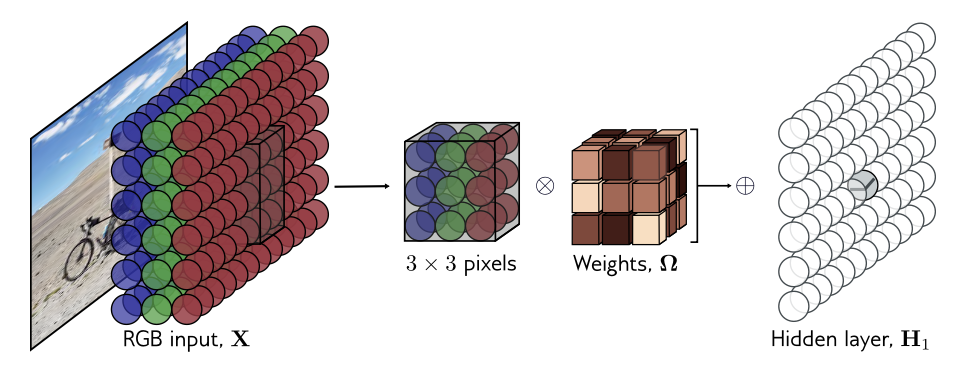

The colored image consists of a 2D input $x$ with $3$ channels ($N_\text{in}=3$) corresponding to the red, green, and blue components. The 3D convolution between the image and a single filter is obtained by pointwise multiplying the $3\times 3\times 3$ kernel weights with the $3\times 3$ RGB patch and then summing over the $3$ dimensions. Then, we “slide” the kernel over the image in both horizontal and vertical directions. The output is a 2D channel of hidden units. To create multiple output channels, we would repeat this process with different kernels/filters. This results in a $N_\text{out}$-dimensional tensor of hidden units at hidden layer $H_1$.

****
**Question 1.10:**
Consider an input batch $x$ with $N_\text{in}$ and shape $[M,N_\text{in},H,W]$ and assume no padding and no stride (`padding`=0, `stride`=1).

1. Consider only a single output channel $N_\text{out}=1$.
   What is the shape of the output $y$ of the hidden layer $H_1$?
   Are the same kernel weights used across input channels? What is the dimension of the kernels?

2. Consider $N_\text{out}>1$ output channels.  What is the shape of the output $y$ of the hidden layer $H_1$? Are the same kernel weights used across output channels? What is the dimension of the kernels?


<font color='green'> Write your answer here <font>

****

****
**Task 1.11:**
Extend the implementation of the convolution operation from **task 1.9** to support multiple input and output channels. Validate your implementation by comparing the output with the result obtained using `nn.functional.conv2d`.

Keep in mind that for each of the $N_\text{out}$ output channels, you need to compute one 3D convolution Also remember that the stride and padding only apply to the height and width dimensions of the images.
****

In [ ]:
#Set padding and stride
stride = 1
padding = 1

#Batch size
M  = 2

#Input and output channels
N_in = 3
N_out = 4

#Input spatial dimensions
H, W = 4, 6

#kernel size
s = 3

# Generate a dummy batch input
num  = M*N_in*H*W
x = torch.arange(num, dtype=torch.float32).view((M,N_in,H,W))

# Generate dummy kernels
k = torch.zeros([N_out,N_in,s,s],dtype=torch.float32)
k[:,:,0,0]=1

# Zero Padding dimensions
H_pad = H + 2*padding
W_pad = W + 2*padding

x_pad = torch.zeros([M,N_in,H_pad,W_pad])
x_pad [:,:, padding : H_pad-padding, padding : W_pad-padding] = x

#Define output dimensions
Hp = (H_pad - s)//stride + 1
Wp = (W_pad - s)//stride + 1

#Define output tensors
y       = torch.zeros((M, N_out, Hp, Wp), dtype=torch.float32)

#############################################################################
#                           START OF YOUR CODE                              #
#############################################################################

#############################################################################
#                            END OF YOUR CODE                               #
#############################################################################

print('Shape of the output y:' , y.shape)

# Compute convolution with torch nn.functional.2dconv
y_torch = nn.functional.conv2d(x,k, padding = padding, stride = stride)

print('Correct implementation: ', torch.allclose(y,y_torch))


# 2 Convolutional Networks
Once we have thoroughly examined each component of a convolutional layer, we can use PyTorch's predefined functionalities to compose a convolutional neural network class by combining different layers.

## 2.1 Convolutional layer
To complete our convolutional layer we only need to integrate all the components discussed in the previous section and include the bias.

****
**Task 2.1:**
Create a PyTorch convolutional layer using `nn.Conv2d` . First check the PyTorch documentation [here](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html) and ensure that it has same input and layer dimensions of **Task 1.12**. Copy the kernel weights from the previous task into the torch layer `weight` and define the torch layer's `bias` as zeros. Perform the forward pass with the dummy batch input $x$ to compute the output `y_torch`. Finally verify that the outcome is consistent with what obtained in the previous task.

Hint: remember that you cannot simply assign a tensor as a layer's parameter. Use conv.some_parameter = torch.nn.Parameter(some_tensor).

****

In [ ]:
#############################################################################
#                           START OF YOUR CODE                              #
#############################################################################
layer = None

layer.weight = None
layer.bias = None

y_torch = None
#############################################################################
#                            END OF YOUR CODE                               #
#############################################################################

print('Shape of output is:', y_torch.shape)
print('PyTorch convolutional layer is correct :',torch.allclose(y,y_torch))


## 2.2  Pooling layer

Another essential component in most of the well performing convolutional neural networks is *pooling*. Pooling layers serve to reduce the spatial dimensionality while retaining the most important information. Basically, pooling simplifies the output from a convolutional layer by replacing the true values with statistics computed within certain windows. Frequently used statistics for pooling include maximum, average and L2-norm.

Pooling layers have their own kernel size that determines the window used to compute the statistics, stride that controls how the window moves across the input and padding. Typically, the stride and kernel size are set to be equal to ensure that output values are used only once for computing the summary statistics.

****
**Question 2.2 (optional):**
Given an input $x$ with shape $[M, N, H, W]$, what would be the shape of the output $y$ after applying pooling with a kernel size of $s$, a stride of $s$ and no padding?

<font color='green'> Write your answer here <font>
****

****
**Task 2.3:**
Create a PyTorch max-pooling layer using `nn.MaxPool2d` (check the PyTorch documentation [here](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html)), with a kernel size and stride of $3$ and no padding. Perform the forward pass using as input `y_torch` and check the dimension of the output `y_pool`.
****

In [ ]:
#############################################################################
#                           START OF YOUR CODE                              #
#############################################################################
y_pool =None
#############################################################################
#                            END OF YOUR CODE                               #
#############################################################################

print('Spatial dimensions of input:', y_torch.shape[-2:])
print('Spatial dimensions of output:', y_pool.shape[-2:])

## 2.3 Combining blocks
Now let's proceed with the implementation of our first convolutional neural network. We will create the network architecture illustrated in the figure below to process for greyscale images of $28\times 28$ pixels.

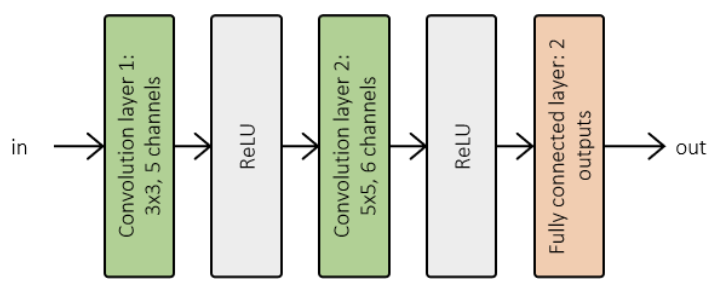

****
**Question 2.4:**
Let us assume that the convolutional layers have no stride (`stride` =1). Compute the padding for each convolutional layer in order to preserve the input spatial dimensions.

<font color='green'> Write your answer here <font>
****

****
**Question 2.5:**
Assuming that we use the `padding` values as in the previous question, what are the kernel sizes? And, what are the shapes of the input and output of the convolutional layers?

<font color='green'> Write your answer here <font>
****

As last layer, we use a fully connected layer often called *decoder*. This name refers to the fact that convolutional layers specialize in encoding the visual features relevant to a specific task. The fully connected layer, in turn, leanrs how to *decode* those features by combining them to produce the final prediction.

Note that the output of the last convolutional layer needs to be reshaped in order to be compatible with the fully connected layer.

****
**Task 2.6:**
Complete the code to build the network class representing the architecture illustrated above. Use padding and stride as in the previous questions. Make sure to define appropriately the dimensions of the linear layer and to reshape the output of the last convolutional layer accordingly.
****

In [ ]:
class CNN (nn.Module):
    """
    PyTorch version of 3-layer CNN
    """

    def __init__(self, N_in, hidden_channels, N_out):
        """
        Initialize a 3-layer CNN.

        Args:
            N_in: number of features of the input image
            hidden_channels: list of two numbers which are number of hidden features
            N_out: number of features in output layer
        """
        super(CNN, self).__init__()

        ########################################################################
        #                         START OF YOUR CODE                           #
        ########################################################################

        ########################################################################
        #                         END OF YOUR CODE                             #
        ########################################################################

    def forward(self, x):

        ########################################################################
        #                         START OF YOUR CODE                           #
        ########################################################################

        ########################################################################
        #                         END OF YOUR CODE                             #
        ########################################################################

        return y

Before using the network, let's inspect it and try the forward pass on a dummy input.

In [ ]:
# Define the channel sizes and output dim
N_in = 1
hidden_channels = [5, 6]
N_out = 2
H, W = 28,28

net = CNN(N_in, hidden_channels, N_out)
summary(net, (N_in, H, W)) # (N_in, H, W)

#Dummy input
M =100
x = torch.randn(M,N_in,H,W)
y = net(x)
print('\n The shape of the forward pass output is:',y.shape)

# 3 MNIST classification problem
In this section, we use the CNN network class to train a classifier for recognizing handwritten digits using [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database). This dataset consists of 60000 training samples and 10000 test samples, each of which is a 28x28 pixel scanned image of a handwritten digit.

The objective of the classifier is to assign to each scanned image a probability distribution over the 10 digits. Precisely, our goal is to train a network to output the probabilities that an input image corresponds to each of the 10 digits.


## 3.1 Data Processing

Let us first load the data

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.1307,), (0.3081,))])

# Get data from torchvision.datasets
train_data = datasets.MNIST('/data', train=True, download=True, transform=transform)
test_data = datasets.MNIST('/data', train=False, download=True, transform=transform)

print(f"Number of training images: {len(train_data)}")
print(f"Number of test images: {len(test_data)}")

We will make use of a dataloader to easily create batches for our training set. For more information on PyTorch Datasets and DataLoaders, have a look [here]( https://pytorch.org/tutorials/beginner/basics/data_tutorial.html). In every training iteration we will sample a random batch of 128 data samples (without replacement) to calculate the loss, gradients and update the weights. After every epoch, i.e. after having processed all samples in the training set, we will evaluate the model on the training and test set to compute training and test errors

In [ ]:
# Set torch seed
random_seed = 42
torch.manual_seed(random_seed)

# Define the batch size
batch_size = 128

# Define the loader
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle = True)
test_loader = DataLoader(test_data, batch_size=batch_size)

Note that we first set the PyTorch seed. This is a predefined starting point for generating randon numbers within the PyTorch framework.  For instance, it is used to initilize the weights of the network. By setting a seed, we guarantee that the outcomes of our experiments are independent of random factors. This is essential to reproduce the results, compare different models and for code debugging.


The images are of size 28x28 in a grayscale format. Let us extract few examples from the test set and have a look at them.

In [ ]:
# Extract the first test batch data and labels
test_x, test_y = next(iter(test_loader))

#Plot 9 images from the first batch
fig, axs = plt.subplots(3, 3, figsize=(4, 4))
for i in range(9):
    x= test_x[i]
    ax = axs[i //3][i % 3]
    ax.imshow(x.view(28, 28), cmap='gray')
    ax.axis('off')
    ax.axis('off')
    ax.set_title('Label '+str(int(test_y[i])),fontsize = 10)

plt.tight_layout()
plt.show()

print(f"Data batch shape: {test_x.shape}")
print(f"Labels batch shape: {test_y.shape}")

****
**Question 3.1:**
What does the second dimension of the batch data represent and why is it equal to $1$?  

<font color='green'> Write your answer here <font>

****

Before looking at the training procedure, we introduce two functions that could be useful. `try_gpu()` does a check if GPUs are available for allocated memory and/or computations. Every `tensor` in pytorch has a `to()` member function in which the device is specified on which the tensor is put. The default is generally CPU while in most cases GPU is beneficial.
`'cuda:0'` is used for GPU and `'cpu'` for CPU. Make sure the network and its inputs both have the same device *type*.

In [ ]:
def try_gpu():
    """
    If GPU is available, return torch.device as cuda:0; else return torch.device
    as cpu.
    """
    if torch.cuda.is_available():
        device = torch.device('cuda:0')
    else:
        device = torch.device('cpu')
    return device

Try to *change runtime type* to T4 GPU and remember to re-run all the previous cells needed.

In [ ]:
device = try_gpu()

print('We are using :', device)

x1 = torch.randn(2,3).to('cpu')
x2 = torch.randn(1,4).to(device)

print('The tensors are on the same device :', x1.device==x2.device)

## 3.2 Softmax layer and loss function

The choice of the final layer in our network architecture is crucial: it must align with the desired output format, which is a probability distribution.

For this reason, we need a *Softmax* output layer. This layer takes the output from the preceding linear layer $z$ and processes it using the softmax function:
\begin{equation}
y_i=\operatorname{softmax}(z)_i=\frac{e^{z_i}}{\sum_{j=0}^9 e^{z_j}}
\end{equation}

Here, $z_i$ represents the score or *logit* associated with the $i$-th class (digit, in this context). The Softmax layer transforms the logits into a  probability distribution, where each $y_i$ represents the probability of an image to belong to class $i$.

****
**Task 3.2:** Here we want to connect a softmax layer to the final fully connected layer of the network architecture defined in **task 2.6**. Assuming that the output of the last convolutional layer has dimensions $[M,1,28,28]$, set the correct number of input $N_\text{in}$ and output features $N_\text{out}$ for the fully connected layer. Then initialize a linear layer `fc` and a softmax layer `softmax` using PyTorch `nn.Softmax` (documentation [here](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html)). Check the outcome of the forward pass over the test dummy batch `test_x`.
****

In [ ]:
########################################################################
#                         START OF YOUR CODE                           #
########################################################################

########################################################################
#                         END OF YOUR CODE                             #
########################################################################

flat_x = test_x.view(test_x.shape[0],-1)

test_z = fc(flat_x)
test_hat_y = softmax (test_z)

predicted_digit = torch.argmax(test_hat_y,dim=1)

print(f"\nLogit: {test_z[0].detach().numpy()}")
print(f"\nClassified digit: {predicted_digit[0]}")

****
**Question 3.3:**
On which device are the layers from the previous task stored?


In [ ]:
print(f'Linear layer device:', fc.weight.device)

<font color='green'> Write your answer here <font>
****

****
**Task 3.4:** Make sure that you have changed the runtime type to GPU. Then move every elements to perform the forward pass on the current device. Check the device of the output.
****

In [ ]:
########################################################################
#                         START OF YOUR CODE                           #
########################################################################

########################################################################
#                         END OF YOUR CODE                             #
########################################################################

test_z = fc(flat_x)
test_hat_y = softmax (test_z)

print(f'Output device:', test_hat_y.device)

We eploy the cross entropy error (why?) as loss function using PyTorch's `nn.CrossEntropyLoss`. Have a careful look at the documentation [here](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#torch.nn.CrossEntropyLoss).

Remakably, we will not explicitly include the last softmax layer in the network class. This is essential to align the output with the chosen loss function: `nn.CrossEntropyLoss` requires as input *unnormalized logits*, representing the raw scores produced by the model before they are transformed into probabilities. The torch function itself handles the softmax transformation.  
This example highlights the importance of consulting the documentation for every PyTorch functionality you use!

During training, we will repeatedly evaluate the network by measuring the accuracy and loss on some dataset. The following function does exactly that for a given network and dataloader. Note that the network should be put into evaluation mode using `net.eval` (similarly, it is easy to change the mode back to training using `net.train`)

In [ ]:
def evaluate_accuracy_loss(data_loader, net, device =torch.device('cpu')):
    """Evaluate accuracy and loss of a model on the given data set."""

    net.eval()  #make sure network is in evaluation mode

    criterion = nn.CrossEntropyLoss(reduction='sum')

    #initialize to zero accuracy and loss
    acc  = 0
    loss = 0
    n = 0

    #Disable gradient computation
    with torch.no_grad():

      for x, y in data_loader:
          #Copy tensors to device
          x, y = x.to(device), y.to(device)
          hat_y = net(x)
          acc += torch.sum((torch.argmax(hat_y, dim=1) == y)).item()
          loss +=criterion(hat_y,y).item()
          n+=y.shape[0]

    acc /= n
    loss/= n

    return 100*acc, loss

## 3.3 Define network class
Let us have a look again at the network defined in **task 2.6**

In [ ]:
# Define the channel sizes and output dim
N_in = 1
hidden_channels = [5,6]
N_out = 10
H, W = 28, 28

#Initialize the network
model = CNN(N_in, hidden_channels, N_out)

#Set Network to device
model.to(device)

summary(model, (N_in, H, W)) # (N_in, H, W)

****
**Question 3.5:**
Can you motivate the number of parameters of the last fully connected layer?  


<font color='green'> Write your answer here <font>
****

In order to reduce such a large number, we redefine the CNN class introducing max-pooling layers.

****
**Task 3.6:** Redefine the CNN class, adding two max-pooling layers with size and stride of $2$. Make sure that all the input-output dimensions are aligned. Then check how many parameters the fully connected layer has now.
****

In [ ]:
class CNN (nn.Module):
    """
    PyTorch version of 3-layer CNN
    """

    def __init__(self, N_in, hidden_channels, N_out):
        """
        Initialize a 3-layer CNN.

        Args:
            N_in: number of features of the input image
            hidden_channels: list of two numbers of the hidden features
            N_out: number of features in output layer
        """
        super(CNN, self).__init__()

        ########################################################################
        #                         START OF YOUR CODE                           #
        ########################################################################


        ########################################################################
        #                         END OF YOUR CODE                             #
        ########################################################################

    def forward(self, x):

        ########################################################################
        #                         START OF YOUR CODE                           #
        ########################################################################


        ########################################################################
        #                         END OF YOUR CODE                             #
        ########################################################################

        return y

In [ ]:
#Initialize the network
model = CNN(N_in, hidden_channels, N_out)

#Set Network to device
model.to(device)

#Check number of parameters
summary(model, (N_in, H, W)) # (N_in, H, W)

## 3.4 Training loop
Finally, we are ready to train the CNN! Let us briefly recall the steps to be taken during training:

1. Define the network model, optimizer and loss function.
2. While not converged:
  - load input batch
  - Perform forward pass through the network
  - Compute batch loss
  - Perform the backward pass and update the parameters


****
**Task 3.7:** Complete the training loop below:
1. Create an instance of the CNN as `model` and define the `criterion` using PyTorch cross entropy loss.
2. Compute the initial loss and accuracy over training and test set using the function introduced in section 3.2.
3. Perform forward pass, compute and store the loss per update step in `loss_steps`, perform backward pass and update step.
****

In [ ]:
# Set torch seed
random_seed = 42
torch.manual_seed(random_seed)

n_epochs = 3
lr = 0.001

#Define network and criterion
########################################################################
#                         START OF YOUR CODE                           #
########################################################################
model = None
criterion = None
########################################################################
#                         END OF YOUR CODE                             #
########################################################################

# Define the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# Containers used to track metrics
train_losses = []
test_losses = []
train_accs = []
test_accs = []

# Compute initial train and test error
########################################################################
#                         START OF YOUR CODE                           #
########################################################################
train_acc, train_loss = None, None
test_acc, test_loss = None, None
########################################################################
#                         END OF YOUR CODE                             #
########################################################################

print(f'Epoch: 0; Training loss: {train_loss:.4f}; Test loss: {test_loss:.4f}')
print('Accuracy of train set: {:.00f}%'.format(train_acc))
print('Accuracy of test set: {:.00f}%'.format(test_acc))
print('')

loss_step = []

# Start time
start_time = time.time()

for epoch in range(n_epochs):

    for i, (x_batch, y_batch) in enumerate(train_loader):

        # Network in training mode and to device
        model.train()

        # Set network and batches to the same device
        model.to(device)
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)

        # Set the gradients to zero
        optimizer.zero_grad()

        #Perform forward pass, compute and store the loss, perform backward pass and parameters update
        ########################################################################
        #                         START OF YOUR CODE                           #
        ########################################################################

        ########################################################################
        #                         END OF YOUR CODE                             #
        ########################################################################

    # Compute and store train and test error
    train_acc, train_loss = evaluate_accuracy_loss(train_loader, model.to('cpu'))
    test_acc, test_loss = evaluate_accuracy_loss(test_loader, model.to('cpu'))

    train_accs.append(train_acc)
    test_accs.append(test_acc)

    train_losses.append(train_loss)
    test_losses.append(test_loss)

    # Print performance
    print(f'Epoch: {epoch+1:.0f}; Training loss: {train_loss:.4f}; Test loss: {test_loss:.4f}')
    print('Accuracy of train set: {:.00f}%'.format(train_acc))
    print('Accuracy of test set: {:.00f}%'.format(test_acc))
    print('')

#End time
end_time =time.time()

print(f'Total training time : {end_time - start_time:.2f} seconds ')



****
**Question 3.8:**
Can you provide an intuitive explanation for the loss and accuracy before training at epoch 0?


<font color='green'> Write your answer here <font>

****

Now we plot the training curves to analyze the results.

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(10, 5)

ax1.plot(loss_step, linewidth=1)
ax1.set_title('Training loss')
ax1.set_xlabel("Update step")
ax1.set_ylabel("Cross Entropy")
ax1.grid()

ax2.plot(train_accs, label='Training', linestyle="--")
ax2.plot(test_accs, label="Test")
ax2.set_title('Accuracy')
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy (%)")
ax2.set_xticks(range(n_epochs),range(1,n_epochs+1))
ax2.grid()
ax2.legend()

ax3.plot(train_losses, label='Training', linestyle="--")
ax3.plot(test_losses, label="Test")
ax3.set_title('Error')
ax3.set_xlabel("Epoch")
ax3.set_ylabel("Cross Entropy")
ax3.set_xticks(range(n_epochs),range(1,n_epochs+1))
ax3.grid()
ax3.legend()

plt.tight_layout()
plt.show()

****
**Question 3.9:** Can you recognize the effect of the random component of stochastic gradient descent? What changes would you expect to see for increasing/decreasing batch sizes? What is the difference between this curve and the dashed blue 'Training' curve shown in the Error plot on the right?

<font color='green'> Write your answer here <font>

****
**Question 3.10:** Does the loss and performance curves look healty?

<font color='green'> Write your answer here <font>
****

**That's all for this lab, see you in the next one!**

**Feedback Form:** please fill in the following form to provide feedback https://forms.office.com/e/Kgab58FACQ